This notebook uses R to plot profiling statistics for a 3D organoid profiling pipeline. 
It visualizes the time taken and memory usage for processing image-based profiles across different sub-image sets.
Each point on these plots represents a channel-compartment-image-set combination, allowing for an analysis of the performance of the profiling process.

```r

In [ ]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "arrow", "ggbreak")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")

Git root directory: ~/Documents/GFF_3D_organoid_profiling_pipeline 


In [ ]:
bandicoot_path <- file.path(
    "~/mnt/bandicoot"
)
if (!dir.exists(bandicoot_path)) {
    profile_base_dir <- file.path(
        root_dir
    )
} else {
    profile_base_dir <- file.path(
        bandicoot_path
    )
}

In [ ]:
# get the profiling stats and load into a dataframe
profiling_path <- file.path(
    profile_base_dir,
    "data/all_patient_profiles/all_patient_featurization_stats.parquet"
)
profiling_stats_df <- arrow::read_parquet(profiling_path)
head(profiling_stats_df)
figures_path <- file.path(
    root_dir,
    "4.processing_image_based_profiles/figures/"
)
if (!dir.exists(figures_path)) {
    dir.create(figures_path, recursive = TRUE)
}

start_time,end_time,start_mem,end_mem,time_taken,mem_usage,gpu,well_fov,patient_id,feature_type,channel,compartment,time_taken_minutes,mem_usage_GB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1753116568,1753118004,161.5898,1627.203,1435.92697,1465.613,CPU,C10-1,NF0014,Granularity,AGP,Cell,23.9321161,1.431263
1752705351,1752705385,186.5820,1659.027,33.92792,1472.445,CPU,C10-1,NF0014,Intensity,AGP,Cell,0.5654653,1.437935
1752705348,1752705414,137.5938,1578.426,66.27354,1440.832,CPU,C10-1,NF0014,Texture,AGP,Cell,1.1045591,1.407063
1753116568,1753118018,162.2617,1624.594,1450.29629,1462.332,CPU,C10-1,NF0014,Granularity,AGP,Cytoplasm,24.1716049,1.428059
1752705351,1752705385,183.0000,1649.316,33.92833,1466.316,CPU,C10-1,NF0014,Intensity,AGP,Cytoplasm,0.5654722,1.431950
1752705347,1752705415,135.9531,1577.031,67.81349,1441.078,CPU,C10-1,NF0014,Texture,AGP,Cytoplasm,1.1302248,1.407303


In [ ]:
width <- 12
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
# plot the time taken for each sub-image set
# where a sub-image set is a channel-compartment-image-set combination
time_plot <- (
    ggplot(
        profiling_stats_df,
        aes(
            x = feature_type,
            y = time_taken_minutes,
            fill = feature_type
        )  
    )
    + geom_boxplot(outlier.shape = NA)
    + geom_jitter(
        aes(color = feature_type),
        position = position_jitterdodge(dodge.width = 0.1, jitter.width = 0.6),
        alpha = 0.1
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "none",
    )
    + labs(
        x = "Feature Type",
        y = "Time Taken (minutes)",
    )
)
# add a break in the y-axis to highlight the outliers
time_plot <- time_plot + scale_y_break(c(15, 16),scales = 0.3, space = 0.05)
# save the plot to the figures directory
ggsave(
    filename = file.path(figures_path, "profiling_time_per_feature_type.png"),
    plot = time_plot,
    width = width,
    height = height,
    dpi = 300
)

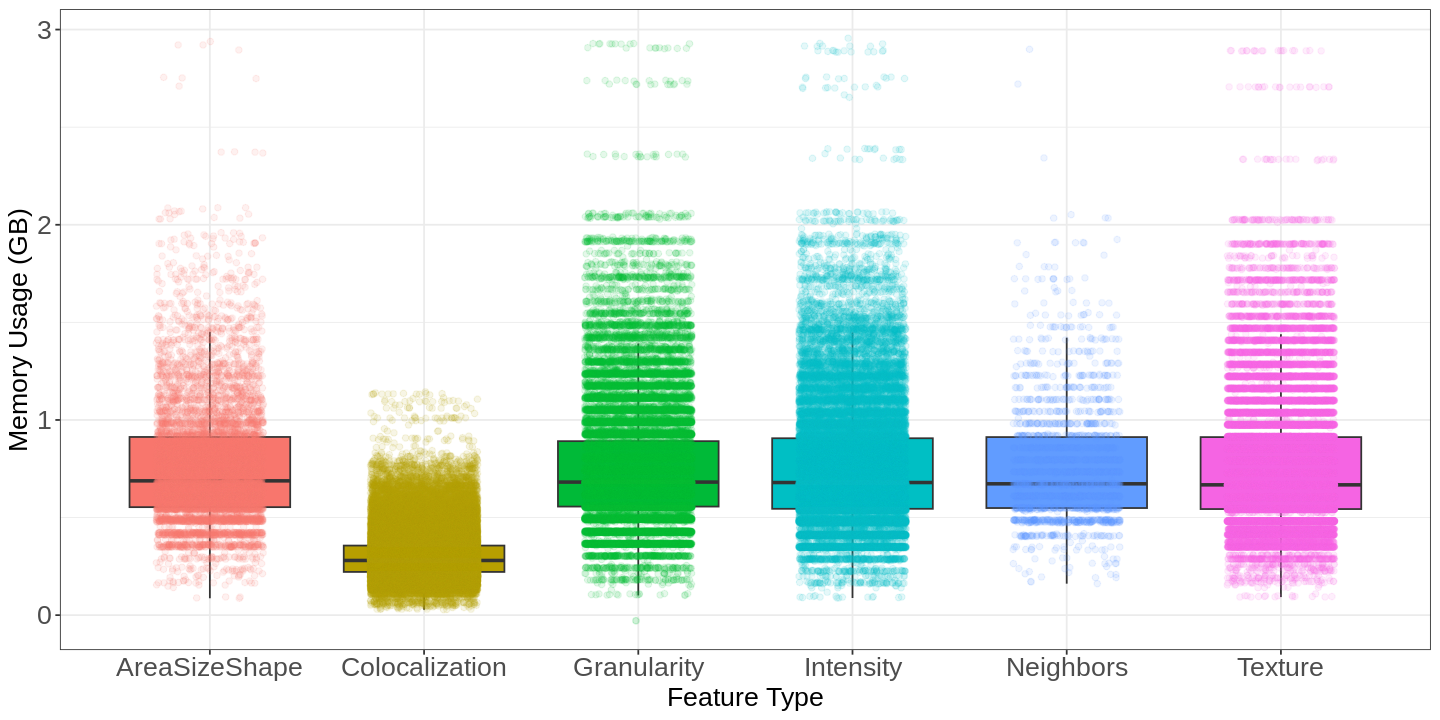

In [ ]:
# plot the memory usage for each sub-image set
# where a sub-image set is a channel-compartment-image-set combination
mem_plot <- (
    ggplot(
        profiling_stats_df,
        aes(
            x = feature_type,
            y = mem_usage_GB,
            fill = feature_type
        )
    )
    + geom_boxplot(outlier.shape = NA)
    + geom_jitter(
        aes(color = feature_type),
        position = position_jitterdodge(dodge.width = 0.9, jitter.width = 0.5),
        alpha = 0.1
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "none",
    )
    + labs(
        x = "Feature Type",
        y = "Memory Usage (GB)",
    )
)
ggsave(
    filename = file.path(figures_path, "profiling_memory_per_feature_type.png"),
    plot = mem_plot,
    width = width,
    height = height,
    dpi = 300
)
mem_plot